In [2]:
from pyncei import NCEIBot
import pandas as pd
from config import access_token

token = access_token

ncei = NCEIBot(token)
dfs = {}

fips_codes = ["FIPS:24510","FIPS:25025","FIPS:26163","FIPS:39035"] 


for code in fips_codes:
    response = ncei.get_data(
        datasetid="NORMAL_ANN",
        locationid=code,
        datatypeid="ANN-DUTR-NORMAL",
        startdate="2010-01-01",
        enddate="2015-12-02",
        units="standard"
    )

    df = response.to_dataframe()
    df["value"] = (df["value"] * (9/5)) + 32
    dfs[code] = df["value"].mean()

In [3]:
dfs

{'FIPS:24510': 64.535,
 'FIPS:25025': 63.14,
 'FIPS:26163': 64.85,
 'FIPS:39035': 58.73}

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {'FIPS:24510': 64.535,
        'FIPS:25025': 63.14,
        'FIPS:26163': 64.85,
        'FIPS:39035': 58.73}

# create a pandas dataframe with the data
df = pd.DataFrame.from_dict(data, orient='index', columns=['heat_index'])

# set the index name to 'FIPS'
df.index.name = 'FIPS'

# display the dataframe
print(df)

            heat_index
FIPS                  
FIPS:24510      64.535
FIPS:25025      63.140
FIPS:26163      64.850
FIPS:39035      58.730


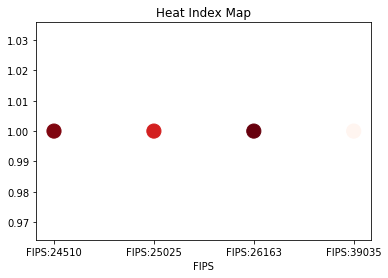

In [5]:
# create the scatter plot
plt.scatter(df.index, [1]*len(df), c=df['heat_index'], cmap='Reds', s=200)

# set the x-axis label
plt.xlabel('FIPS')

# set the title
plt.title('Heat Index Map')

# display the plot
plt.show()


In [6]:
import pandas as pd
import seaborn as sns

data = {'FIPS:24510': 64.535, 'FIPS:25025': 63.14, 'FIPS:26163': 64.85, 'FIPS:39035': 58.73}

data2 = {'County': ['Baltimore City', 'Suffolk County', 'Wayne County', 'Cuyahoga County'],
        'Heat Index': [64.535, 63.14, 64.85, 58.73, ]}
df = pd.DataFrame(data2)

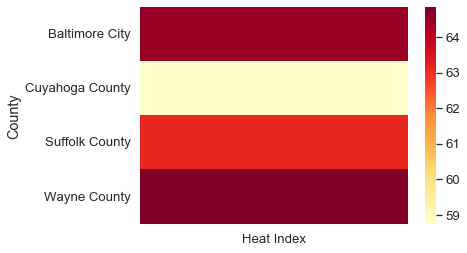

In [7]:
sns.set(font_scale=1.2)
sns.heatmap(data=df.pivot_table(index='County', values='Heat Index'), cmap='YlOrRd')

In [8]:
walkdf = pd.read_csv('updated_walk.csv')
walkdf

,FIPS,County or equivalent,State or equivalent,OBJECTID,GEOID10,GEOID20,TRACTCE,BLKGRPCE,CSA,CBSA,...,D5DR,D5DRI,D5DE,D5DEI,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,Avg Temp
0,24510.0,Baltimore City[p],Maryland,109833.4824,2.451020e+11,2.451020e+11,190799.7320,2.404288,548.0,12580.0,...,-153.136561,-152.784173,-153.136554,-152.669899,16.607963,17.932619,14.144461,2490.456784,3.650990e+05,64.535
1,25025.0,Suffolk County[k],Massachusetts,114369.3560,2.502510e+11,2.502510e+11,110392.1269,2.399381,148.0,14460.0,...,-464.390880,-463.964984,-464.390892,-463.982379,17.368421,18.026316,14.936791,2543.072190,4.820084e+05,63.140
2,26163.0,Wayne County,Michigan,120823.2629,2.616360e+11,2.616360e+11,551866.8200,2.218441,220.0,19820.0,...,-44126.890800,-44126.657220,-44126.890810,-44126.696690,13.732711,9.967069,10.546926,3764.575014,9.563130e+05,64.850
3,39035.0,Cuyahoga County,Ohio,176558.5792,3.903520e+11,3.903520e+11,149025.3485,2.014630,184.0,17460.0,...,-14285.570580,-14285.259920,-14285.570590,-14285.322270,12.335628,14.337349,11.934165,4402.858334,2.776163e+06,58.730


In [9]:
import numpy as np
pivot = pd.pivot_table(walkdf, values='Avg Temp', index='NatWalkInd', columns='County or equivalent', aggfunc=np.sum)


[Text(0.5, 0, 'Baltimore City[p]'),
 Text(1.5, 0, 'Cuyahoga County'),
 Text(2.5, 0, 'Suffolk County[k]'),
 Text(3.5, 0, 'Wayne County')]

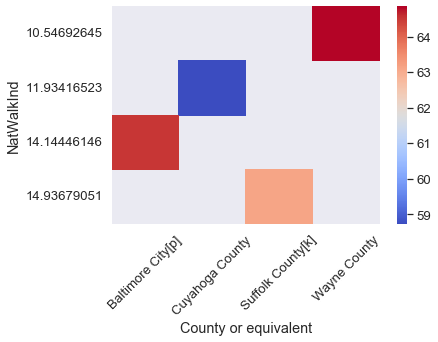

In [10]:
# create a heatmap plot using seaborn
ax = sns.heatmap(pivot, cmap='coolwarm')

# rotate the column labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


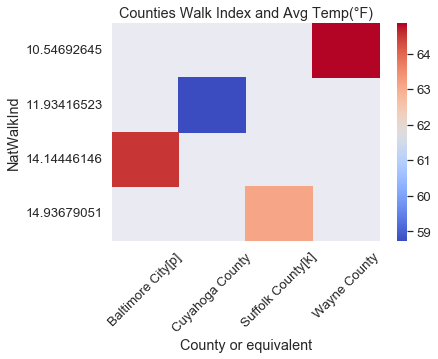

In [11]:

plt.title("Counties Walk Index and Avg Temp(°F)")
ax = sns.heatmap(pivot, cmap='coolwarm')

# rotate the column labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


plt.show()